In [3]:
import xarray as xr
import pyorc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pyproj import Transformer

In [7]:
video_file = R"..\..\res\pont-cour.mp4"

Scanning video: 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]


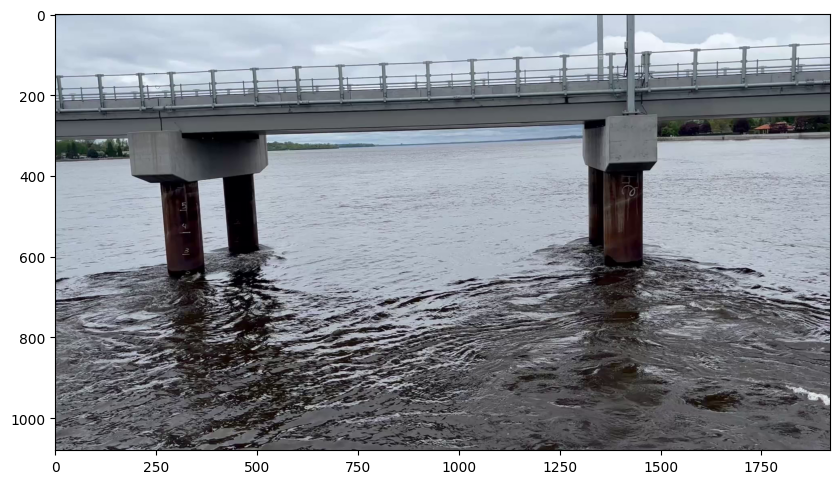

In [8]:
videofilm = pyorc.Video(video_file, start_frame=0, end_frame=1)
frame = videofilm.get_frame(0, method="rgb")

# plot frame on a notebook-style window
f = plt.figure(figsize=(10, 6))
plt.imshow(frame)

In [ ]:
gcps = dict(
    src=[
        [1400, 630], # pixel bas droite     
        [1340, 560],# pixel haut droite
        [470, 590], # haut gauche
        [300, 650], # bas gauche
    ]
)

f = plt.figure(figsize=(16, 9))
plt.imshow(frame)
plt.plot(*zip(*gcps["src"]), "rx", markersize=20, label="Control points")
plt.legend()